In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [3]:
# Loading the dataset
loan = pd.read_csv('../train.csv')
print(f'There are {loan.shape[0]} rows and {loan.shape[1]} columns')
loan.head() # getting the first the 5 rows

There are 614 rows and 13 columns


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# Checking the information about the dataset
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
# Checking missing values
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
# General statistics of the dataset for numerical features
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## EXPLORATORY DATA ANALYSIS

1. The relationship between the applicant’s gender and the loan application
2. The link between the education background and the applicant’s loan
3. How are the career, credit and property location associated to the loan application respectively?
4. Some overview analysis in terms of your observations and analysis


### 1. The relationship between the applicant’s gender and the loan application
 `For this assignment we have two columns matching the description of this exercise Loan_Status, and Gender which are both categorical features`

In [7]:
loan.groupby('Gender')['Loan_Status'].value_counts()

Gender  Loan_Status
Female  Y               75
        N               37
Male    Y              339
        N              150
Name: count, dtype: int64

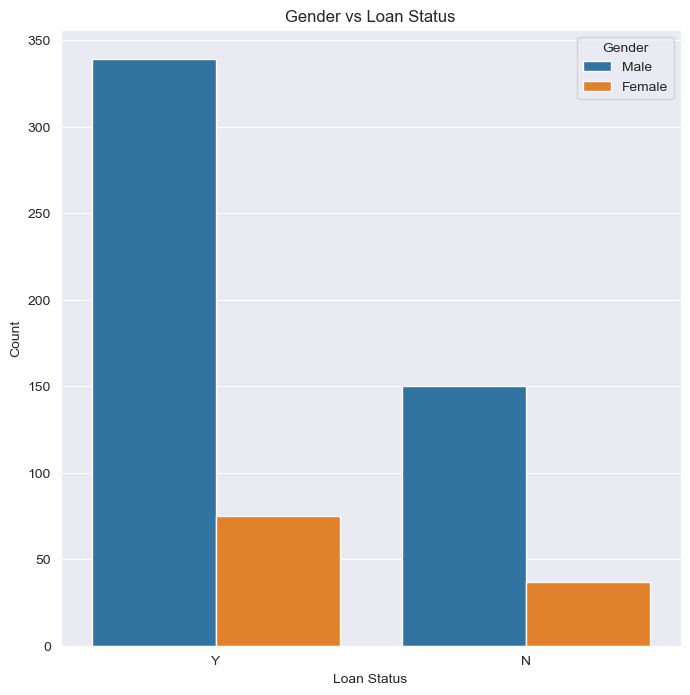

In [8]:
# Plot showing the relationship of Gender with corresponding Loan Status
plt.figure(figsize = (8,8))
sns.countplot(x=loan['Loan_Status'], hue=loan['Gender'], data=loan)
plt.title('Gender vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

### 2. The link between the education background and the applicant’s loan

In [9]:
loan.groupby('Loan_Status')['Education'].value_counts()

Loan_Status  Education   
N            Graduate        140
             Not Graduate     52
Y            Graduate        340
             Not Graduate     82
Name: count, dtype: int64

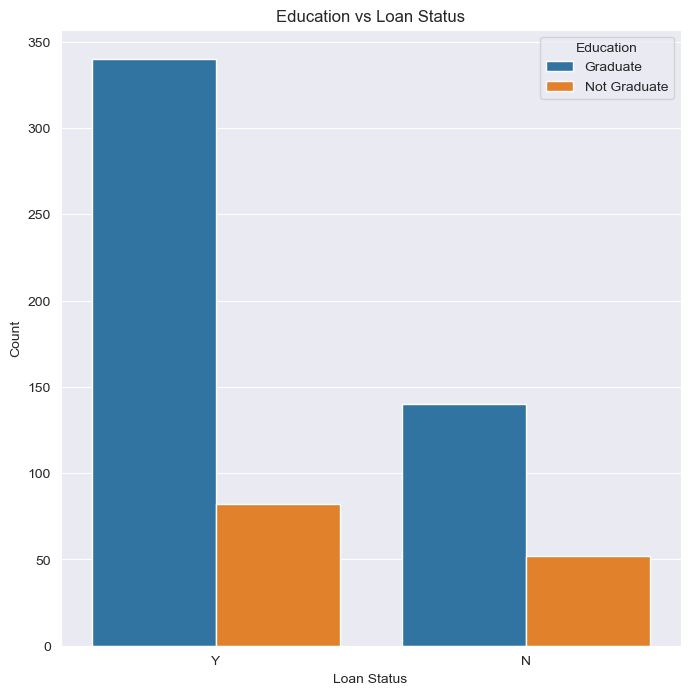

In [10]:
# Plot of the education and loan status
plt.figure(figsize = (8,8))
sns.countplot(x='Loan_Status', hue='Education', data=loan)
plt.title('Education vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

### 3. How are the career, credit and property location associated to the loan application respectively?

In [11]:
# The respective columns are Self_Employed (object - Boolean), Credit_History (float64), Property Area (Object)
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


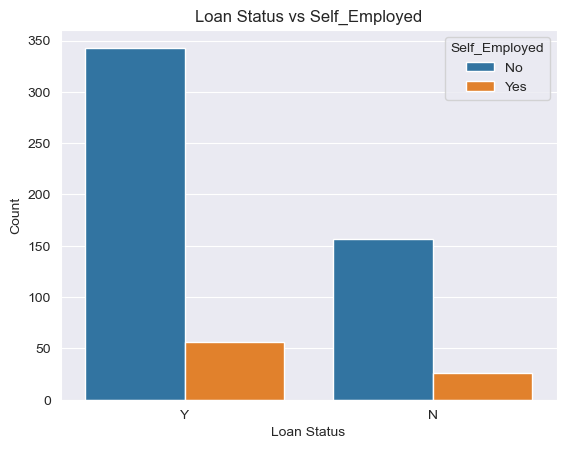

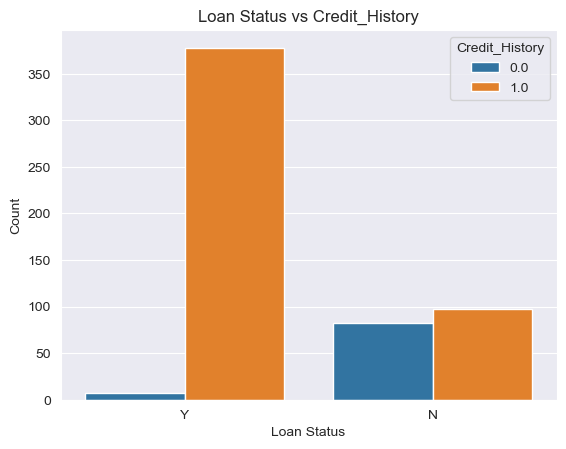

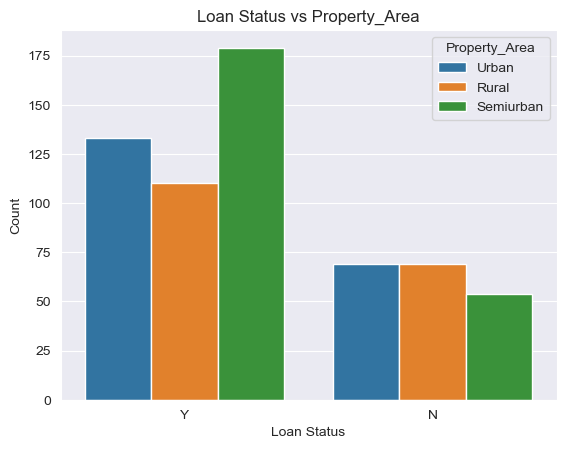

In [12]:
important_columns = ['Self_Employed', 'Credit_History', 'Property_Area']
for col in important_columns:
    sns.countplot(x='Loan_Status', hue=col, data=loan)
    plt.title(f'Loan Status vs {col}')
    plt.xlabel('Loan Status')
    plt.ylabel('Count')
    plt.show()

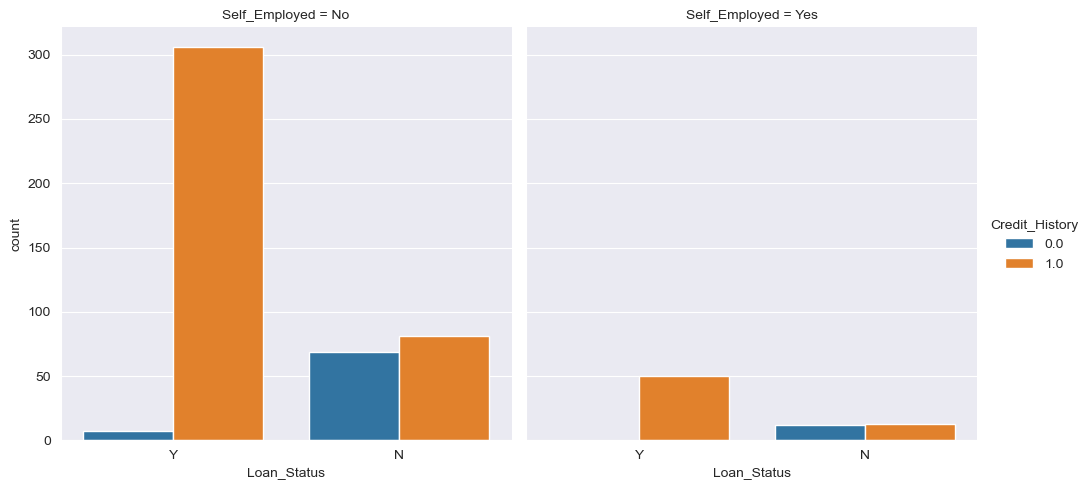

In [13]:
# Categorical Plot of
sns.catplot(x='Loan_Status', col='Self_Employed', hue='Credit_History',
            data=loan, kind='count')

### 4. Some overview analysis in terms of your observations and analysis

<Axes: title={'center': 'Correlation of Loan Status'}>

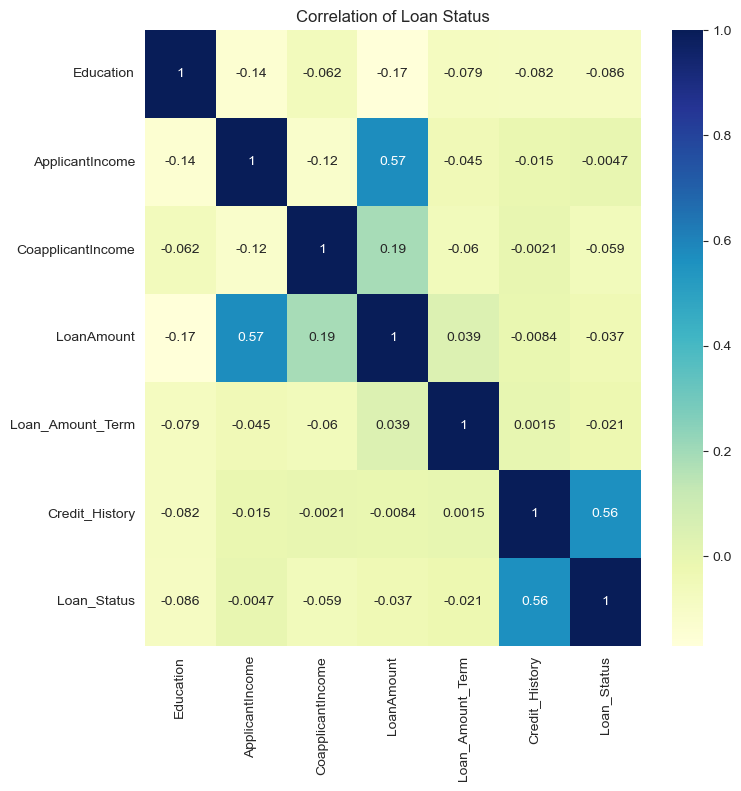

In [29]:
from sklearn.preprocessing import LabelEncoder
loan2 = loan.copy() # Copying the dataset
'''
Encoding some features to obtain more mathematical correlations.
'''
le = LabelEncoder()
loan2['Loan_Status'] = le.fit_transform(loan2['Loan_Status'])
loan2['Education'] = le.fit_transform(loan2['Education'])
plt.figure(figsize = (8,8))
loan_correlation = loan2.select_dtypes(include=[np.number]).corr()
plt.title('Correlation of Loan Status')
sns.heatmap(loan_correlation, annot=True, cmap='YlGnBu')

> 1. The loan distribution is varied on different classes such as employment and different gender roles
 2. Also loan status is directly correlated with credit history compared to other features.
